In [1]:
import sys

sys.path.append('../../code/')
import os
import json
from datetime import datetime
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

import networkx as nx

from load_data import load_citation_network, case_info
from helper_functions import *

%load_ext autoreload
%autoreload 2
%matplotlib inline

data_dir = '../../data/'
court_name = 'scotus'



In [2]:
court_adj_mat = pd.read_csv(data_dir + 'clean/jurisdictions_adj_mat.csv', index_col='Unnamed: 0')
court_adj_mat.index = [j + '_ing' for j in court_adj_mat.index]
court_adj_mat.columns= [j + '_ed' for j in court_adj_mat.columns]

# Grab federal appellate subnetwork

In [3]:
fed_appellate = ['ca' + str(i+1) for i in range(11)]
fed_appellate.append('cafc')
fed_appellate.append('cadc')

fed_appellate_ing = [j + '_ing' for j in fed_appellate]
fed_appellate_ed = [j + '_ed' for j in fed_appellate]

In [4]:
fed_appellate_network = court_adj_mat.loc[fed_appellate_ing, fed_appellate_ed]

In [5]:
fed_appellate_network

,ca1_ed,ca2_ed,ca3_ed,ca4_ed,ca5_ed,ca6_ed,ca7_ed,ca8_ed,ca9_ed,ca10_ed,ca11_ed,cafc_ed,cadc_ed
ca1_ing,151702,6656,8507,5928,14008,6875,11991,8486,13901,6697,5072,570,5575
ca2_ing,4229,93422,4849,3134,5570,3374,5918,3715,7092,2879,2226,272,3307
ca3_ing,9683,9711,183320,7779,17799,8669,14532,9541,16940,7783,6017,895,6501
ca4_ing,6677,5920,7749,186566,13910,7350,11521,8450,12537,6601,5771,471,5605
ca5_ing,8541,9195,19136,8885,434933,9263,13788,11229,17853,8531,6696,665,7818
ca6_ing,8227,7556,9942,7980,16663,262366,15882,11250,16922,7979,6346,671,5900
ca7_ing,9839,10101,12246,8392,17765,10952,326501,13214,19171,9299,7310,773,7766
ca8_ing,6857,6463,7917,6813,14228,7754,12830,282702,14574,7916,4992,497,5438
ca9_ing,9664,10656,12182,8566,20039,9710,15850,11809,468980,9775,6702,1179,10503
ca10_ing,7021,5248,7746,5983,13616,7149,11674,9973,14871,237590,5536,600,5139


In [6]:
import seaborn.apionly as sns

In [12]:
Gn = fed_appellate_network.apply(lambda c: c/sum(c), axis=1)

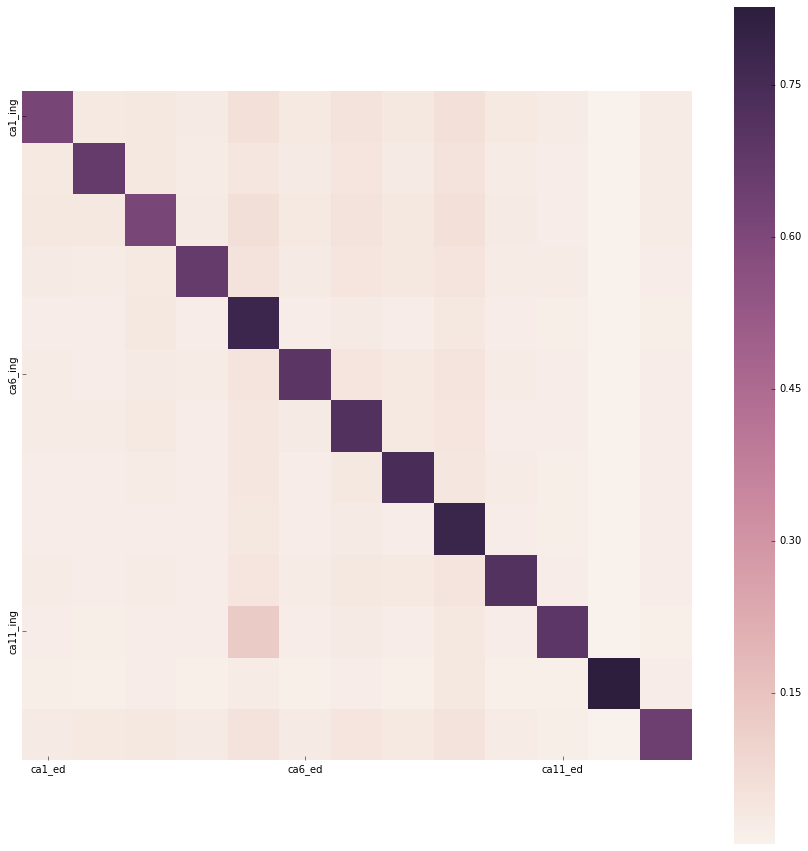

In [13]:
plt.figure(figsize=[15, 15])
sns.heatmap(Gn,
            square=True,
            xticklabels=5,
            yticklabels=5);